# 10장

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]
y = (iris.target==0).astype(np.int8)

per_clf = Perceptron()
per_clf.fit(X, y)

print(per_clf.predict([[2, 0.5]]))

[0]


In [2]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

print(X_train_full.shape, X_train_full.dtype)

X_valid, X_train = X_train_full[:5000]/255, X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


(60000, 28, 28) uint8


In [3]:
# 모델에 대해 설명

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)        

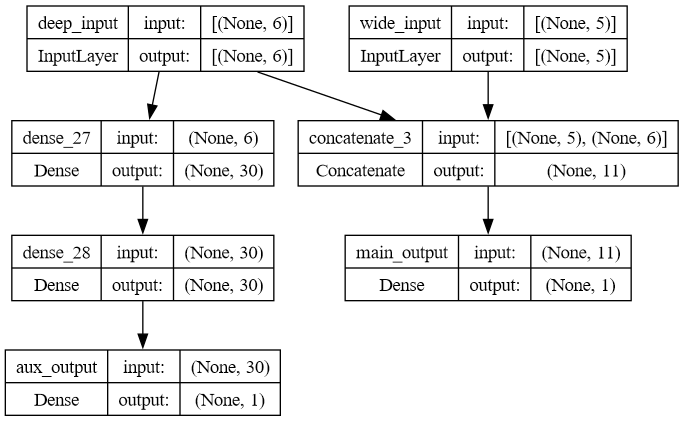

In [23]:
keras.utils.plot_model(model, show_shapes=True)

In [4]:
print(model.layers)
hidden1 = model.layers[1]
print(hidden1.name)
print(model.get_layer(hidden1.name) is hidden1) # 'dense_3'

weights, biases = hidden1.get_weights()
print(weights)
print(weights.shape)
print(biases)
print(biases.shape)

[<keras.layers.reshaping.flatten.Flatten object at 0x000001824F5BC9D0>, <keras.layers.core.dense.Dense object at 0x000001820DC64A30>, <keras.layers.core.dense.Dense object at 0x000001820DC64B20>, <keras.layers.core.dense.Dense object at 0x000001820DC64BE0>]
dense_3
True
[[-1.73438080e-02  5.99424392e-02 -4.42717150e-02 ... -5.31697273e-03
  -1.40301995e-02  4.13058177e-02]
 [ 6.56843185e-05  6.24416769e-02  7.27343857e-02 ... -1.98143013e-02
   7.70173967e-04 -2.43248232e-02]
 [ 6.81484491e-02 -1.97064914e-02 -1.88228600e-02 ...  1.62172392e-02
  -5.82510941e-02 -3.67255509e-03]
 ...
 [ 8.71173292e-03  4.61328551e-02  4.27697822e-02 ...  6.56170994e-02
  -6.06078357e-02  5.37771434e-02]
 [ 6.27318770e-02  2.95563936e-02 -1.16543025e-02 ... -5.34846857e-02
   6.68981969e-02 -3.22337076e-02]
 [ 3.47011164e-02 -4.87701073e-02 -5.71951047e-02 ...  6.48223311e-02
   1.82889178e-02 -2.08719373e-02]]
(784, 300)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.

In [5]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
# 컴파일에 대해 설명

In [6]:
history = model.fit(X_train, y_train, batch_size=1028, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 36s 18ms/step - loss: 0.7157 - accuracy: 0.7641 - val_loss: 0.5139 - val_accuracy: 0.8204
Epoch 2/30
1719/1719 [==============================] - 28s 17ms/step - loss: 0.4889 - accuracy: 0.8288 - val_loss: 0.4542 - val_accuracy: 0.8410
Epoch 3/30
1719/1719 [==============================] - 27s 16ms/step - loss: 0.4433 - accuracy: 0.8455 - val_loss: 0.4141 - val_accuracy: 0.8560
Epoch 4/30
1719/1719 [==============================] - 28s 16ms/step - loss: 0.4165 - accuracy: 0.8540 - val_loss: 0.3910 - val_accuracy: 0.8676
Epoch 5/30
1719/1719 [==============================] - 25s 14ms/step - loss: 0.3952 - accuracy: 0.8614 - val_loss: 0.3866 - val_accuracy: 0.8654
Epoch 6/30
1719/1719 [==============================] - 29s 17ms/step - loss: 0.3799 - accuracy: 0.8657 - val_loss: 0.3861 - val_accuracy: 0.8652
Epoch 7/30
1719/1719 [==============================] - 26s 15ms/step - loss: 0.3653 - accuracy: 0.8721 - val_loss: 0.3748 -

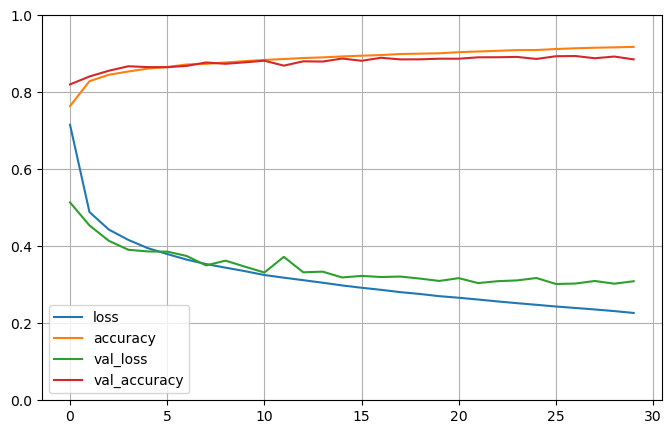

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show(block=False)
plt.pause(2)
plt.close()

In [8]:
print(model.evaluate(X_test, y_test))
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

313/313 [==============================] - 2s 6ms/step - loss: 0.3452 - accuracy: 0.8746
[0.3452319800853729, 0.8745999932289124]
1/1 [==============================] - 0s 97ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [12]:
y_pred = np.argmax(y_proba, axis=1)
print(y_pred)
print(np.array(class_names)[y_pred])

[9 2 1]
['Ankle boot' 'Pullover' 'Trouser']


In [6]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [12]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss='mean_squared_error', optimizer='sgd')
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
12/12 [==============================] - 0s 13ms/step - loss: 3.9773 - val_loss: 2.2314
Epoch 2/20
12/12 [==============================] - 0s 7ms/step - loss: 1.7687 - val_loss: 1.2948
Epoch 3/20
12/12 [==============================] - 0s 7ms/step - loss: 1.1528 - val_loss: 0.9778
Epoch 4/20
12/12 [==============================] - 0s 7ms/step - loss: 0.9369 - val_loss: 0.8505
Epoch 5/20
12/12 [==============================] - 0s 7ms/step - loss: 0.8412 - val_loss: 0.7939
Epoch 6/20
12/12 [==============================] - 0s 8ms/step - loss: 0.7895 - val_loss: 0.7647
Epoch 7/20
12/12 [==============================] - 0s 5ms/step - loss: 0.7567 - val_loss: 0.7421
Epoch 8/20
12/12 [==============================] - 0s 5ms/step - loss: 0.7322 - val_loss: 0.7249
Epoch 9/20
12/12 [==============================] - 0s 5ms/step - loss: 0.7135 - val_loss: 0.7113
Epoch 10/20
12/12 [==============================] - 0s 5ms/step - loss: 0.6977 - val_loss: 0.6978
Epoch 11/20
12/12 

In [14]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

model.compile('SGD', 'mse')

model.fit(X_train, y_train, 1028, 20, validation_data=(X_valid, y_valid))

model.evaluate(X_test, y_test)

Epoch 1/20
12/12 [==============================] - 0s 16ms/step - loss: 5.0876 - val_loss: 2.4309
Epoch 2/20
12/12 [==============================] - 0s 9ms/step - loss: 1.7862 - val_loss: 1.2510
Epoch 3/20
12/12 [==============================] - 0s 9ms/step - loss: 1.0220 - val_loss: 0.8504
Epoch 4/20
12/12 [==============================] - 0s 8ms/step - loss: 0.7865 - val_loss: 0.7289
Epoch 5/20
12/12 [==============================] - 0s 8ms/step - loss: 0.7088 - val_loss: 0.6831
Epoch 6/20
12/12 [==============================] - 0s 6ms/step - loss: 0.6759 - val_loss: 0.6622
Epoch 7/20
12/12 [==============================] - 0s 6ms/step - loss: 0.6576 - val_loss: 0.6491
Epoch 8/20
12/12 [==============================] - 0s 7ms/step - loss: 0.6435 - val_loss: 0.6376
Epoch 9/20
12/12 [==============================] - 0s 8ms/step - loss: 0.6311 - val_loss: 0.6269
Epoch 10/20
12/12 [==============================] - 0s 6ms/step - loss: 0.6201 - val_loss: 0.6171
Epoch 11/20
12/12 

0.5248721837997437

In [16]:
input_A = keras.layers.Input(shape=[5], name='wide_input')  # short_path
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, input_B])
output = keras.layers.Dense(1, name='output')(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=output)

model.compile(loss='mse', optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 3.5799 - val_loss: 1.8518
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 1.3394 - val_loss: 0.9707
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.8276 - val_loss: 0.7433
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6931 - val_loss: 0.6777
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6488 - val_loss: 0.6480
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6288 - val_loss: 0.6354
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6158 - val_loss: 0.6279
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6057 - val_loss: 0.6205
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5973 - val_loss: 0.6148
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5902 - val_loss: 0.6084

In [17]:
input_A = keras.layers.Input(shape=[5], name='wide_input')  # short_path
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, input_B])
output = keras.layers.Dense(1, name='main_output')(concat)
aux_output = keras.layers.Dense(1, name='aux_output')(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

model.compile(loss=['mse', 'mse'], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

history = model.fit((X_train_A, X_train_B), [y_train, y_train], epochs=20,
                    validation_data=((X_valid_A, X_valid_B), [y_valid, y_valid]))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), [y_test, y_test])
print(total_loss, main_loss, aux_loss)

y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))
print(y_pred_main, y_pred_aux, sep='\n\n')

Epoch 1/20
363/363 [==============================] - 2s 5ms/step - loss: 3.7721 - main_output_loss: 3.6267 - aux_output_loss: 5.0798 - val_loss: 2.2302 - val_main_output_loss: 1.9936 - val_aux_output_loss: 4.3594
Epoch 2/20
363/363 [==============================] - 2s 4ms/step - loss: 1.6398 - main_output_loss: 1.4335 - aux_output_loss: 3.4969 - val_loss: 1.2479 - val_main_output_loss: 1.0143 - val_aux_output_loss: 3.3502
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 1.0365 - main_output_loss: 0.8573 - aux_output_loss: 2.6495 - val_loss: 0.9468 - val_main_output_loss: 0.7432 - val_aux_output_loss: 2.7797
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.8407 - main_output_loss: 0.6905 - aux_output_loss: 2.1929 - val_loss: 0.8399 - val_main_output_loss: 0.6644 - val_aux_output_loss: 2.4199
Epoch 5/20
363/363 [==============================] - 2s 4ms/step - loss: 0.7669 - main_output_loss: 0.6364 - aux_output_loss: 1.9413 - val_loss

In [104]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel()
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), [y_test, y_test])
print(total_loss, main_loss, aux_loss)

y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))
print(y_pred_main, y_pred_aux, sep='\n\n')

Epoch 1/10
363/363 [==============================] - 3s 6ms/step - loss: 2.9417 - output_1_loss: 2.7509 - output_2_loss: 4.6585 - val_loss: 1.3224 - val_output_1_loss: 1.0906 - val_output_2_loss: 3.4087
Epoch 2/10
363/363 [==============================] - 2s 4ms/step - loss: 1.1574 - output_1_loss: 0.9494 - output_2_loss: 3.0300 - val_loss: 1.0088 - val_output_1_loss: 0.8488 - val_output_2_loss: 2.4490
Epoch 3/10
363/363 [==============================] - 1s 4ms/step - loss: 0.9587 - output_1_loss: 0.8089 - output_2_loss: 2.3071 - val_loss: 0.8956 - val_output_1_loss: 0.7773 - val_output_2_loss: 1.9604
Epoch 4/10
363/363 [==============================] - 2s 4ms/step - loss: 0.8659 - output_1_loss: 0.7493 - output_2_loss: 1.9151 - val_loss: 0.8281 - val_output_1_loss: 0.7303 - val_output_2_loss: 1.7079
Epoch 5/10
363/363 [==============================] - 2s 4ms/step - loss: 0.8090 - output_1_loss: 0.7104 - output_2_loss: 1.6964 - val_loss: 0.7804 - val_output_1_loss: 0.6938 - val_ou

In [37]:
input_A = keras.layers.Input(shape=[5], name='wide_input')  # short_path
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, input_B])
output = keras.layers.Dense(1, name='main_output')(concat)
aux_output = keras.layers.Dense(1, name='aux_output')(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

model.compile(loss=['mse', 'mse'], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

history = model.fit((X_train_A, X_train_B), [y_train, y_train], epochs=20,
                    validation_data=((X_valid_A, X_valid_B), [y_valid, y_valid]))

model.save('my_keras_model.h5')
model = keras.models.load_model('my_keras_model.h5')
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))
print(y_pred_main, y_pred_aux, sep='\n\n')

Epoch 1/20
363/363 [==============================] - 2s 6ms/step - loss: 4.0300 - main_output_loss: 3.9161 - aux_output_loss: 5.0551 - val_loss: 2.3664 - val_main_output_loss: 2.1611 - val_aux_output_loss: 4.2145
Epoch 2/20
363/363 [==============================] - 2s 5ms/step - loss: 1.7202 - main_output_loss: 1.4937 - aux_output_loss: 3.7590 - val_loss: 1.2969 - val_main_output_loss: 1.0868 - val_aux_output_loss: 3.1881
Epoch 3/20
363/363 [==============================] - 2s 5ms/step - loss: 1.0785 - main_output_loss: 0.8719 - aux_output_loss: 2.9377 - val_loss: 0.9720 - val_main_output_loss: 0.7926 - val_aux_output_loss: 2.5866
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.8667 - main_output_loss: 0.6961 - aux_output_loss: 2.4021 - val_loss: 0.8570 - val_main_output_loss: 0.7071 - val_aux_output_loss: 2.2053
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.7827 - main_output_loss: 0.6415 - aux_output_loss: 2.0540 - val_loss

In [ ]:
# # API 모델
# model.save(path + model_name.h5)
# model = keras.models.load_model(path + model_name.h5)

# # 서브클래싱 모델
# # 모델 전체 저장
# model.save(path + dir_name, save_format='tf')
# model = keras.models.load_model(path + dir_name, custom_objects={'SubClassing': SubClassing})

# # 모델 가중치 저장 ※ 확장자는 ckpt
# model.save_weights(path + model_name.ckpt)
# # 동일한 구조로 모델 정의
# model = SubClassing()
# model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer='SGD')
# model.load_weights(path + model_name.ckpt)

# # 확장자를 h5를 썼을 경우에는 fit을 해야지만 load 가능 내부 변수 어쩌구하는데 이유는 모름. gpt도 모름
# model.save_weights(path + model_name.h5)
# # 동일한 구조로 모델 정의
# model = SubClassing()
# model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer='SGD')
# # 최소 조건으로 fit
# history = model.fit((X_train_A[:1], X_train_B[:1]), (y_train[:1], y_train[:1]), epochs=1)
# # 가중치 로드
# model.load_weights(path + model_name.h5)

# y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))
# print(y_pred_main, y_pred_aux, sep='\n\n')

In [117]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print('\nval/train: {:.2f}'.format(logs['val_loss']/logs['loss']))

# 아래의 함수를 이용해서 callback 생성 가능
# on_batch_begin, on_batch_end, 
# on_epoch_begin, on_epoch_end, 
# on_predict_batch_begin, on_predict_batch_end, on_predict_begin, on_predict_end,
# on_test_batch_begin, on_test_batch_end, on_test_begin, on_test_end,
# on_train_batch_begin, on_train_batch_end, on_train_begin, on_train_end,

In [118]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel()
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

checkpoint_cb = keras.callbacks.ModelCheckpoint('my_keras_model.ckpt')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=1, restore_best_weights=True)
custom_callback = PrintValTrainRatioCallback()

history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=100,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)),
                    callbacks=[checkpoint_cb, early_stopping_cb, custom_callback])
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), [y_test, y_test])
print(total_loss, main_loss, aux_loss)

y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))
print(y_pred_main, y_pred_aux, sep='\n\n')

Epoch 1/100
350/363 [===========================>..] - ETA: 0s - loss: 2.1316 - output_1_loss: 1.7828 - output_2_loss: 5.2710INFO:tensorflow:Assets written to: my_keras_model.ckpt\assets

val/train: 0.56
363/363 [==============================] - 2s 6ms/step - loss: 2.1017 - output_1_loss: 1.7536 - output_2_loss: 5.2344 - val_loss: 1.1803 - val_output_1_loss: 0.8841 - val_output_2_loss: 3.8455
Epoch 2/100
353/363 [============================>.] - ETA: 0s - loss: 1.0569 - output_1_loss: 0.8161 - output_2_loss: 3.2243INFO:tensorflow:Assets written to: my_keras_model.ckpt\assets

val/train: 0.88
363/363 [==============================] - 2s 6ms/step - loss: 1.0560 - output_1_loss: 0.8167 - output_2_loss: 3.2095 - val_loss: 0.9314 - val_output_1_loss: 0.7529 - val_output_2_loss: 2.5372
Epoch 3/100
357/363 [============================>.] - ETA: 0s - loss: 0.8954 - output_1_loss: 0.7444 - output_2_loss: 2.2548INFO:tensorflow:Assets written to: my_keras_model.ckpt\assets

val/train: 0.93
36

In [125]:
import os
root_logdir = os.path.join(os.curdir, 'my_logs')

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")

    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2024_08_13-17_14_33'

In [127]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel()
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

# 텐서보드 콜백
tensornoard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit((X_train_A, X_train_B), (y_train, y_train), batch_size=1028, epochs=30,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)),
                    callbacks=[tensornoard_cb])

Epoch 1/30
12/12 [==============================] - 1s 20ms/step - loss: 6.1776 - output_1_loss: 6.2492 - output_2_loss: 5.5335 - val_loss: 5.8941 - val_output_1_loss: 5.9660 - val_output_2_loss: 5.2467
Epoch 2/30
12/12 [==============================] - 0s 11ms/step - loss: 5.4051 - output_1_loss: 5.4124 - output_2_loss: 5.3399 - val_loss: 5.0609 - val_output_1_loss: 5.0609 - val_output_2_loss: 5.0610
Epoch 3/30
12/12 [==============================] - 0s 11ms/step - loss: 4.7708 - output_1_loss: 4.7272 - output_2_loss: 5.1639 - val_loss: 4.4473 - val_output_1_loss: 4.3972 - val_output_2_loss: 4.8981
Epoch 4/30
12/12 [==============================] - 0s 12ms/step - loss: 4.2777 - output_1_loss: 4.1958 - output_2_loss: 5.0142 - val_loss: 3.9687 - val_output_1_loss: 3.8814 - val_output_2_loss: 4.7539
Epoch 5/30
12/12 [==============================] - 0s 11ms/step - loss: 3.8707 - output_1_loss: 3.7591 - output_2_loss: 4.8742 - val_loss: 3.5836 - val_output_1_loss: 3.4681 - val_output_

In [129]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)
with writer.as_default():
    for step in range(1, 1000+1):
        tf.summary.scalar('my_scalar', np.sin(step/10), step=step)
        data = (np.random.randn(100) + 2) * step /100
        tf.summary.histogram('my_hist', data, buckets=50, step=step)
        images = np.random.rand(2, 32, 32, 3)   # 32*32 RGB 이미지
        tf.summary.image('my_images', images * step / 1000, step=step)
        texts = ['The step is ' + str(step), 'Its square is ' + str(step**2)]
        tf.summary.text('my_text', texts, step=step)
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio('my_audio', audio, sample_rate=48000, step=step)

In [130]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu'))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss='mse', optimizer=optimizer)
    
    return model

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)
# keras.wrappers.scikit_learn: Keras 모델을 Scikit-Learn의 API와 호환되도록 만드는 유틸리티

keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)
print(mse_test)

Epoch 1/100
  1/363 [..............................] - ETA: 51s - loss: 4.8881

C:\Users\why\AppData\Local\Temp\ipykernel_1352\4071130229.py:12: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


363/363 [==============================] - 1s 3ms/step - loss: 1.4173 - val_loss: 0.6984
Epoch 2/100
363/363 [==============================] - 1s 3ms/step - loss: 0.6320 - val_loss: 0.5980
Epoch 3/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5630 - val_loss: 0.5512
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5259 - val_loss: 0.5229
Epoch 5/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5035 - val_loss: 0.5086
Epoch 6/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4885 - val_loss: 0.4967
Epoch 7/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4775 - val_loss: 0.4913
Epoch 8/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4693 - val_loss: 0.4853
Epoch 9/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4621 - val_loss: 0.4848
Epoch 10/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4568 - val_loss: 0.4757
E

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    'n_hidden': [0, 1, 2, 3],
    # 'n_neurons': np.arange(1,100),
    'n_neurons': [1, 3, 5, 8, 16, 32, 64],
    'learning_rate': reciprocal(3e-4, 3e-2)
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, batch_size=1028, epochs=100,
                  validation_data=(X_valid, y_valid), verbose=0,
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

print(rnd_search_cv.best_params_)
print(rnd_search_cv.best_score_)
print(rnd_search_cv.best_estimator_)
model = rnd_search_cv.best_estimator_.model

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

